# Lecture 2
## Asympotic Sliding Mode Control
* Considering a System:
$$
\dot{x_1} = x_2 \tag{2.1} \\
\dot{x_2} = u+f(x_1,x_2,t) \\
\dot{u} = \nu \\
$$
where $x_1(0)=x_{10}$,$x_2(0)=x_{20}$, and $u(0)=0$.
* Sliding variable
$$
\sigma = \sigma(x_1,x_2)=x_2+c x_1; c>0 
$$
Assumption:

    1.$ \vert{f(x_1,x_2,t)}\vert \leq L $
    
    2.$ \vert{\dot{f}(x_1,x_2,t)}\vert \leq \overline{L} $
* Auxiliary Sliding variable: 

$$ s=\dot{\sigma}+\overline{c}\sigma $$

If we are able to design a control law $\nu$, that provides finite-time convergence of $s$, ie $s \to 0$, then ideal sliding mode occurs in the sliding surface:

$$ s=\dot{\sigma}+\overline{c}\sigma = 0. $$

As a result, sliding variable and its derivatives convergence to zero asymptotically.

$$
s\dot{s}=s\cdot \left[ \nu+c\overline{c}x_2+(c+\overline{c})u+(c+\overline{c})f+\dot{f}\right]
$$
let $\nu = -c\overline{c}x_2-(c+\overline{c})u+\nu_1$, then 
$$
\begin{align}
s\dot{s}=s\cdot \left[ \nu_1+(c+\overline{c})f+\dot{f}\right] \\
        \leq s\nu_1 + \vert{s}\vert(\overline{L}+(c+\overline{c})L)
\end{align}
$$
let $\nu_1=-\rho sign(s)$, then
$$
s\dot{s}\leq \vert{s}\vert(-\rho + \overline{L}+(c+\overline{c})L)
$$
Lyapunov function: 

$V= \frac{1}{2} s^2$, 

and for finite time convergence, $\dot{\nu}\leq -\alpha V^{\frac{1}{2}}$.
$$
\vert{s}\vert(-\rho + \overline{L}+(c+\overline{c})L) = - \frac{\alpha}{\sqrt{2}}s \\
\rho = \overline{L}+(c+\overline{c})L + \frac{\alpha}{\sqrt{2}}
$$

so :

$$
\nu = -c\overline{c}x_2-(c+\overline{c})u-\rho sign(s)
$$

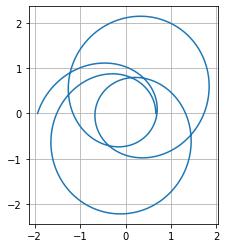

In [3]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np


sqrt = np.sqrt
sin = np.sin
sign = np.sign

def deriv_z(z, phi):
    u, udot = z
    return [udot, -u + sqrt(u)]

phi = np.linspace(0, 7.0*pi, 2000)
zinit = [1.49907, 0]
z = integrate.odeint(deriv_z, zinit, phi)
u, udot = z.T
# plt.plot(phi, u)
fig, ax = plt.subplots()
ax.plot(1/u*cos(phi), 1/u*sin(phi))
ax.set_aspect('equal')
plt.grid(True)
plt.show()